# ANALSIS E-COMMERCE PUBLIC
- Nama: I Ketut Diatmika Caturdianta
- Email: caturdianta8@gmail.com

## Menentukan Pertanyaan Bisnis
- Bagaimana cara mengetahui produk dengan total penjualan tertinggi dan terendah?
- Bagaimana tingkat penjualan E-commerce seiring bejalannya waktu?
- Bagiaman karakteristik demografis pelanggan dan apakah terdapat preferensi pembelian di antara mereka?
- Jumlah pelanggan terbanyak berada di wilayah mana saja?
- Menilai bagaimana tingkat kepuasan pelanggan terhdap pelayanan yang diberikan?

## Menyiapkan semua library yang dibutuhkan

In [101]:
# import library yang dibutuhkan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import unidecode
import urllib
import matplotlib.image as mpimg

## Data Wrangling

### Gathering Data

In [102]:
customers_dataframe = pd.read_csv('D:\KULIAH\Dicoding\Submission\dataset\customers_dataset.csv')
customers_dataframe.head()

<>:1: SyntaxWarning: invalid escape sequence '\K'
<>:1: SyntaxWarning: invalid escape sequence '\K'
C:\Users\Caturdianta\AppData\Local\Temp\ipykernel_13532\4200824181.py:1: SyntaxWarning: invalid escape sequence '\K'
  customers_dataframe = pd.read_csv('D:\KULIAH\Dicoding\Submission\dataset\customers_dataset.csv')


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [103]:
geo_dataframe = pd.read_csv('D:\KULIAH\Dicoding\Submission\dataset\geolocation_dataset.csv')
geo_dataframe.head()

<>:1: SyntaxWarning: invalid escape sequence '\K'
<>:1: SyntaxWarning: invalid escape sequence '\K'
C:\Users\Caturdianta\AppData\Local\Temp\ipykernel_13532\60803834.py:1: SyntaxWarning: invalid escape sequence '\K'
  geo_dataframe = pd.read_csv('D:\KULIAH\Dicoding\Submission\dataset\geolocation_dataset.csv')


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [104]:
orderitems_dataframe = pd.read_csv('D:\KULIAH\Dicoding\Submission\dataset\order_items_dataset.csv')
orderitems_dataframe.head()

<>:1: SyntaxWarning: invalid escape sequence '\K'
<>:1: SyntaxWarning: invalid escape sequence '\K'
C:\Users\Caturdianta\AppData\Local\Temp\ipykernel_13532\3189643337.py:1: SyntaxWarning: invalid escape sequence '\K'
  orderitems_dataframe = pd.read_csv('D:\KULIAH\Dicoding\Submission\dataset\order_items_dataset.csv')


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [105]:
orderreviews_dataframe = pd.read_csv('D:\KULIAH\Dicoding\Submission\dataset\order_reviews_dataset.csv')
orderreviews_dataframe.head()

<>:1: SyntaxWarning: invalid escape sequence '\K'
<>:1: SyntaxWarning: invalid escape sequence '\K'
C:\Users\Caturdianta\AppData\Local\Temp\ipykernel_13532\2484349512.py:1: SyntaxWarning: invalid escape sequence '\K'
  orderreviews_dataframe = pd.read_csv('D:\KULIAH\Dicoding\Submission\dataset\order_reviews_dataset.csv')


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [106]:
orderpayments_dataframe = pd.read_csv('D:\KULIAH\Dicoding\Submission\dataset\order_payments_dataset.csv')
orderpayments_dataframe.head()

<>:1: SyntaxWarning: invalid escape sequence '\K'
<>:1: SyntaxWarning: invalid escape sequence '\K'
C:\Users\Caturdianta\AppData\Local\Temp\ipykernel_13532\2843867497.py:1: SyntaxWarning: invalid escape sequence '\K'
  orderpayments_dataframe = pd.read_csv('D:\KULIAH\Dicoding\Submission\dataset\order_payments_dataset.csv')


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [107]:
productcategory_dataframe = pd.read_csv('D:\KULIAH\Dicoding\Submission\dataset\product_category_name_translation.csv')
productcategory_dataframe.head()

<>:1: SyntaxWarning: invalid escape sequence '\K'
<>:1: SyntaxWarning: invalid escape sequence '\K'
C:\Users\Caturdianta\AppData\Local\Temp\ipykernel_13532\3859415599.py:1: SyntaxWarning: invalid escape sequence '\K'
  productcategory_dataframe = pd.read_csv('D:\KULIAH\Dicoding\Submission\dataset\product_category_name_translation.csv')


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [108]:
orders_dataframe = pd.read_csv('D:\KULIAH\Dicoding\Submission\dataset\orders_dataset.csv')
orders_dataframe.head()

<>:1: SyntaxWarning: invalid escape sequence '\K'
<>:1: SyntaxWarning: invalid escape sequence '\K'
C:\Users\Caturdianta\AppData\Local\Temp\ipykernel_13532\2639403402.py:1: SyntaxWarning: invalid escape sequence '\K'
  orders_dataframe = pd.read_csv('D:\KULIAH\Dicoding\Submission\dataset\orders_dataset.csv')


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [109]:
sellers_dataframe = pd.read_csv('D:\KULIAH\Dicoding\Submission\dataset\sellers_dataset.csv')
sellers_dataframe.head()

<>:1: SyntaxWarning: invalid escape sequence '\K'
<>:1: SyntaxWarning: invalid escape sequence '\K'
C:\Users\Caturdianta\AppData\Local\Temp\ipykernel_13532\1067997780.py:1: SyntaxWarning: invalid escape sequence '\K'
  sellers_dataframe = pd.read_csv('D:\KULIAH\Dicoding\Submission\dataset\sellers_dataset.csv')


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [110]:
products_dataframe = pd.read_csv('D:\KULIAH\Dicoding\Submission\dataset\products_dataset.csv')
products_dataframe.head()

<>:1: SyntaxWarning: invalid escape sequence '\K'
<>:1: SyntaxWarning: invalid escape sequence '\K'
C:\Users\Caturdianta\AppData\Local\Temp\ipykernel_13532\4228632111.py:1: SyntaxWarning: invalid escape sequence '\K'
  products_dataframe = pd.read_csv('D:\KULIAH\Dicoding\Submission\dataset\products_dataset.csv')


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


### Assessing Data

Melihat infomarsi dari masing-masing DataFrame yang ada

In [111]:
print('\n', customers_dataframe.info())
print('\n', geo_dataframe.info())
print('\n', orderitems_dataframe.info())
print('\n', orderreviews_dataframe.info())
print('\n', orderpayments_dataframe.info())
print('\n', productcategory_dataframe.info())
print('\n', orders_dataframe.info())
print('\n', sellers_dataframe.info())
print('\n', products_dataframe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non

Melakukan pengecekan untuk memastikan tidak ada data null pada setiap DataFrame

In [112]:
print('\nInfo data null customers:\n', customers_dataframe.isnull().sum())
print('\nInfo data null geolocation:\n', geo_dataframe.isnull().sum())
print('\nInfo data null order items:\n', orderitems_dataframe.isnull().sum())
print('\nInfo data null order reviews:\n', orderreviews_dataframe.isnull().sum())
print('\nInfo data null order payments:\n', orderpayments_dataframe.isnull().sum())
print('\nInfo data null products category:\n', productcategory_dataframe.isnull().sum())
print('\nInfo data null orders:\n', orders_dataframe.isnull().sum())
print('\nInfo data null products:\n', products_dataframe.isnull().sum())
print('\nInfo data null sellers:\n', sellers_dataframe.isnull().sum())


Info data null customers:
 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Info data null geolocation:
 geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Info data null order items:
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Info data null order reviews:
 review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Info data null order payments:
 order_id                0
payment_sequential      0
payment_type          

Terlihat bahwa order reviews, orders, products terdapat data null

Mengecek apakah ada data duplikat pada setiap DataFrame

In [113]:
print('Info data duplikat customers:', customers_dataframe.duplicated().sum())
print('Info data duplikat geolocation:', geo_dataframe.duplicated().sum())
print('Info data duplikat order items:', orderitems_dataframe.duplicated().sum())
print('Info data duplikat order payments:', orderpayments_dataframe.duplicated().sum())
print('Info data duplikat order reviews:', orderreviews_dataframe.duplicated().sum())
print('Info data duplikat orders:', orders_dataframe.duplicated().sum())
print('Info data duplikat product category:', productcategory_dataframe.duplicated().sum())
print('Info data duplikat sellers:', sellers_dataframe.duplicated().sum())
print('Info data duplikat products:', products_dataframe.duplicated().sum())

Info data duplikat customers: 0
Info data duplikat geolocation: 261831
Info data duplikat order items: 0
Info data duplikat order payments: 0
Info data duplikat order reviews: 0
Info data duplikat orders: 0
Info data duplikat product category: 0
Info data duplikat sellers: 0
Info data duplikat products: 0


Menampilkan data discribe Dataframe yang ada

In [114]:
print('\nData describe customers:\n', customers_dataframe.describe(include='all'))
print('\nData describe geolocation:\n', geo_dataframe.describe(include='all'))
print('\nData describe order items:\n', orderitems_dataframe.describe(include='all'))
print('\nData describe order payments:\n', orderpayments_dataframe.describe(include='all'))
print('\nData describe order reviews:\n', orderreviews_dataframe.describe(include='all'))
print('\nData describe orders:\n', orders_dataframe.describe(include='all'))
print('\nData describe product category:\n', productcategory_dataframe.describe(include='all'))
print('\nData describe products:\n', products_dataframe.describe(include='all'))
print('\nData describe sellers:\n', sellers_dataframe.describe(include='all'))


Data describe customers:
                              customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     06b8999e2fba1a1fbc88172c00ba8bc7  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        customer_zip_code_prefix cus

Menampilkan info dari geolocation Dataframe

In [115]:
geo_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


### Cleaning Data

Dapat dilihat bahwa dataset Geolocation memiliki data duplikat, saya memutuskan untuk tidak menghapus duplikat karena kemungkinan besar duplikasi terjadi pada kolom **'geolocation_city' dan 'geolocation_state'**, di mana nilai tertinggi adalah **Sao Paulo (SP)**.

In [116]:
orderreviews_dataframe[orderreviews_dataframe.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [117]:
orderreviews_dataframe.review_comment_title.value_counts()

review_comment_title
Recomendo                    423
recomendo                    345
Bom                          293
super recomendo              270
Excelente                    248
                            ... 
Luminaria sobrepor led 18      1
Não recebi.                    1
produto com lacre violado      1
Atraso Entrega                 1
Foto enganosa                  1
Name: count, Length: 4527, dtype: int64

In [118]:
orderreviews_dataframe[orderreviews_dataframe.review_comment_message.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,NaN,NaN,2017-12-13 00:00:00,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,NaN,NaN,2018-04-27 00:00:00,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42


In [119]:
orderreviews_dataframe.review_comment_message.value_counts()

review_comment_message
Muito bom                                                                                                                                                                                              230
Bom                                                                                                                                                                                                    189
muito bom                                                                                                                                                                                              122
bom                                                                                                                                                                                                    107
Recomendo                                                                                                                                                            

In [120]:
orderreviews_dataframe.fillna(value="no comment", inplace=True)

In [121]:
orders_dataframe[orders_dataframe.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaN,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaN,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


In [122]:
datetime_oi = ["shipping_limit_date"]
 
for column in datetime_oi:
  orderitems_dataframe[column] = pd.to_datetime(orderitems_dataframe[column])

In [123]:
datetime_or = ["review_creation_date","review_answer_timestamp"]
 
for column in datetime_or:
  orderreviews_dataframe[column] = pd.to_datetime(orderreviews_dataframe[column])

In [124]:
datetime_oo = ["order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"]
 
for column in datetime_oo:
  orders_dataframe[column] = pd.to_datetime(orders_dataframe[column])

In [125]:
orderitems_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [126]:
orderreviews_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [127]:
orders_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


## Exploratory Data Analysis (EDA)

### Explore customers_dataframe

In [128]:
customers_dataframe.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
71350,2f1a3baba1b833c18c5da7b721b360b2,030b3bb8818a752ca223944036bad5d7,35910,santa maria de itabira,MG
52878,070bca17bc76a393ba985b11b2f9deda,7942503b866fda5908a460d4c80ede0f,83260,matinhos,PR
20456,d1568f1104d2015dc70bdf7d9ab88dd2,93b52b7591ca73fc44cdac70146a1b0d,4904,sao paulo,SP
55139,598d3839f11db213a5be6bcb757bc3bc,02e43e4f1b48cdb9dcfe8ca5d35aafd2,23075,rio de janeiro,RJ
77349,e9c505b4b9d21fde74008d694abd9bb2,c6b9d6795c596087955f39001d7d9ffe,29018,vitoria,ES


In [129]:
customers_dataframe.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [130]:
customers_dataframe.customer_id.is_unique

True

In [131]:
customers_dataframe.customer_id.duplicated

<bound method Series.duplicated of 0        06b8999e2fba1a1fbc88172c00ba8bc7
1        18955e83d337fd6b2def6b18a428ac77
2        4e7b3e00288586ebd08712fdd0374a03
3        b2b6027bc5c5109e529d4dc6358b12c3
4        4f2d8ab171c80ec8364f7c12e35b23ad
                       ...               
99436    17ddf5dd5d51696bb3d7c6291687be6f
99437    e7b71a9017aa05c9a7fd292d714858e8
99438    5e28dfe12db7fb50a4b2f691faecea5e
99439    56b18e2166679b8a959d72dd06da27f9
99440    274fa6071e5e17fe303b9748641082c8
Name: customer_id, Length: 99441, dtype: object>

In [132]:
customers_dataframe.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [133]:
customers_dataframe.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

### Explore orderpayments_dataframe

In [134]:
orderpayments_dataframe.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
72006,8131a21c0655540d820b50ab3e4d4d14,1,voucher,1,48.54
10077,2a9d70160f5851dffc39e01a5486fb62,1,credit_card,1,66.73
2827,1e721ce42c736da389dc1e266e969acd,1,credit_card,10,100.82
31112,ceb435f46d86d2fb2890334c4862315a,1,credit_card,3,48.21
93769,9ddd723e703903eeb90abbd2af0ddc24,1,boleto,1,54.05


In [135]:
orderpayments_dataframe.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [136]:
orderpayments_dataframe.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

### Explore orders_dataframe

In [137]:
orders_dataframe.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
54567,5fe2df2e3a6df134feba908c1ae1a63d,5af8ae09d2997ccfadcc3ee3802d4053,delivered,2017-04-27 08:46:47,2017-04-27 08:55:17,2017-04-28 17:52:54,2017-05-08 13:35:57,2017-05-29
83636,f88829307eec85099ddcd3c06c6f5763,de79877745fff8a64a1007de3241a237,delivered,2017-12-02 10:06:05,2017-12-02 10:18:36,2017-12-14 16:11:40,2017-12-20 23:43:23,2018-01-05
1751,44e5e4871a2b86afa53f08e86001bca5,5176b354a363c7c6884ea58c62884608,delivered,2017-12-20 12:25:46,2017-12-20 13:02:25,2017-12-20 23:09:28,2017-12-26 20:16:54,2018-01-09
53458,e054faeb6af72de4dc4a76cb6e0cfebd,3c9a5d288ed7a341eea51d6aa657c612,delivered,2017-04-09 21:00:12,2017-04-09 21:15:08,2017-04-11 09:02:15,2017-04-18 13:25:38,2017-05-04
9783,0ab0adc81c98426d2cde86ab2ba52bc3,4ddafff707b98c2f941aca4da98b3044,delivered,2017-04-20 12:57:14,2017-04-20 13:10:51,2017-04-24 14:43:02,2017-04-29 10:13:13,2017-05-12


In [138]:
delivery_time = orders_dataframe["order_delivered_customer_date"] - orders_dataframe["order_delivered_carrier_date"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_dataframe["delivery_time"] = round(delivery_time/86400)

In [139]:
orders_dataframe.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
33728,5c54271ee917cae6f59c5609f8baa986,04dc51f7e58146766c01a8b361bbdc03,delivered,2017-10-22 23:12:53,2017-10-22 23:25:39,2017-10-24 18:58:51,2017-11-04 11:48:42,2017-11-16,11.0
39553,dbade3512c5b746ad2732bb5abd9bbff,f9c4ef88e2f5e4ec187a3258553b679f,delivered,2018-06-12 23:27:39,2018-06-13 00:00:50,2018-06-13 12:11:00,2018-06-18 14:33:16,2018-06-29,5.0
95665,16cbf959cfdb88c47ee2a29303547ec2,0888ceb9767c8f38f24962e72e7c32fa,delivered,2018-05-15 19:52:47,2018-05-15 20:17:07,2018-05-16 07:54:00,2018-05-21 20:34:50,2018-06-06,6.0
85748,a8f1a0a4af9a038ba340364a741a602a,607d0000aa9de05c99eb26ea53c69011,delivered,2017-02-24 17:07:05,2017-02-24 17:22:10,2017-03-02 06:57:29,2017-03-13 14:45:15,2017-03-24,11.0
27113,3ad3f961be5de9064df7ea138472ab70,9561cbe131566d0fc9b5836adb0a6f51,delivered,2017-08-16 22:10:31,2017-08-17 00:15:20,2017-08-22 20:40:02,2017-09-04 21:47:55,2017-09-19,13.0


<Axes: >

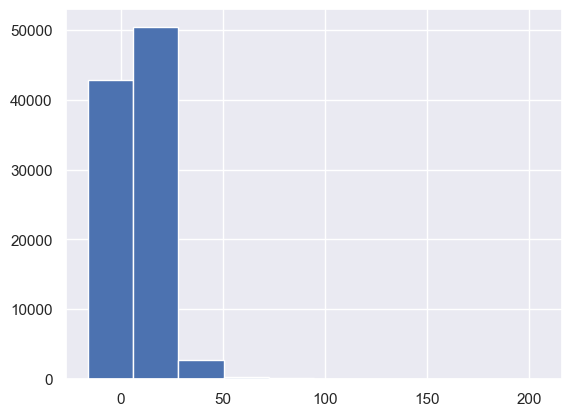

In [140]:
orders_dataframe.delivery_time.hist()

In [141]:
customer_id_in_orders_df = orders_dataframe.customer_id.values
customers_dataframe["status"] = customers_dataframe["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders_df else "Non Active")
customers_dataframe.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
55881,b4ca85bae934dd7e0ae4a60388f35638,f94be6793b2753d7cae83ebcd73efcc8,23090,rio de janeiro,RJ,Active
22559,477370c733868fe48e64bb3882ef1b4c,6ff003dcf2085702d2acf451c8cc58a8,4606,sao paulo,SP,Active
31902,5feb7f86e689cbef134d509cf9845867,1b7bb39384884cb6e6e6ee9ba9f1ca11,17340,barra bonita,SP,Active
83181,6b3dbb998a3d51850455a9c3e2623d25,06268d8f74c7184ef40d1a3861688cfc,3935,sao paulo,SP,Active
99089,b433290fdbd7a32a08cc233d445c4692,a0361c0779cda9416bf7aba3a0f7884b,91910,porto alegre,RS,Active


In [142]:
customers_dataframe.groupby(by="status").customer_id.count()

status
Active    99441
Name: customer_id, dtype: int64

### Explore customers_dataframe & orders_dataframe
#### Merge customers_dataframe & orders_dataframe

In [143]:
customer_orders_dataframe = pd.merge(
    left=customers_dataframe,
    right=orders_dataframe,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
customer_orders_dataframe.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,14.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,3.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,10.0


In [144]:
customer_orders_dataframe.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).head(10)

customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: order_id, dtype: int64

In [145]:
customer_orders_dataframe.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).head(10)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
Name: order_id, dtype: int64

In [146]:
customer_orders_dataframe.groupby(by="customer_zip_code_prefix").order_id.nunique().sort_values(ascending=False).head(10)

customer_zip_code_prefix
22790    142
24220    124
22793    121
24230    117
22775    110
29101    101
13212     95
35162     93
22631     89
38400     87
Name: order_id, dtype: int64

In [147]:
customer_orders_dataframe.groupby(by="order_status").order_id.nunique().sort_values(ascending=False).head(10)

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_id, dtype: int64

### Merge orderpayments_dataframe & orderreviews_dataframe

In [148]:
order_payrev_dataframe = pd.merge(
    left=orderpayments_dataframe,
    right=orderreviews_dataframe,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
order_payrev_dataframe.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,no comment,no comment,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,no comment,Aprovada,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,no comment,no comment,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,no comment,no comment,2017-12-21,2017-12-22 01:10:39


In [149]:
order_payrev_dataframe.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False).head(10)

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

In [150]:
order_payrev_dataframe.sort_values(by="payment_value", ascending=False)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
52415,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08,211fa81a22870cc634265ea85b751e40,1.0,no comment,"Peço por favor verificar a entrega do pedido, ...",2017-10-18,2017-10-19 13:10:39
34565,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.88,6b9a600f1bb824da4ca38f65baf42526,1.0,Entrega incompleta,"Comprei 04 unidades, e foram entregues apenas ...",2018-07-27,2018-07-28 02:36:10
41660,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.31,e2fbd9f0ef7b724c7ecb351601a857e7,5.0,no comment,"Mesmo a máquina ter vindo errada, já se pronti...",2017-03-04,2017-03-04 21:40:41
49871,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.21,NaN,NaN,NaN,NaN,NaT,NaT
86018,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.66,1b73e6c7cd135008ebeb18404b776ddc,5.0,no comment,no comment,2017-06-06,2017-06-07 19:35:23
...,...,...,...,...,...,...,...,...,...,...,...
78326,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.00,f28281373ab8815bafafe371218f02ce,1.0,no comment,A mercadoria não foi entregue. Entrara em cont...,2017-05-21,2017-05-24 16:21:27
51581,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.00,9efef4d70190c1bdb9b12872cc8144fc,3.0,Produto Avariado,Recebi o Diario do Bebê c um pequeno rasgo na ...,2018-08-17,2018-08-18 15:32:40
37030,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.00,f28281373ab8815bafafe371218f02ce,1.0,no comment,A mercadoria não foi entregue. Entrara em cont...,2017-05-21,2017-05-24 16:21:27
94953,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.00,b54d02f7f1520b3995f84b77ab0dacb3,1.0,Péssima meu produtdefeito,no comment,2018-08-24,2018-08-25 02:24:54


In [151]:
order_payrev_dataframe.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value":  ["min", "max"]
})

order_id payment_value          
              nunique           min       max
payment_type                                 
boleto          19784         11.62   7274.88
credit_card     76505          0.01  13664.08
debit_card       1528         13.38   4445.50
not_defined         3          0.00      0.00
voucher          3866          0.00   3184.34

#### Merge customer_orders_dataframe & order_payrev_dataframe

In [152]:
customers_payrev_dataframe = pd.merge(
    left=customer_orders_dataframe,
    right=order_payrev_dataframe,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
customers_payrev_dataframe.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,...,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,no comment,no comment,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,...,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,no comment,no comment,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,...,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,no comment,no comment,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,...,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,no comment,no comment,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,...,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52


### Explore orderitems_dataframe & sellers_dataframe

#### Merge orderitems_dataframe & sellers_dataframe

In [153]:
item_seller_dataframe = pd.merge(
    left=orderitems_dataframe,
    right=sellers_dataframe,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
item_seller_dataframe.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [154]:
item_seller_dataframe.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).head(10)

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
guarulhos          50
ibitinga           49
santo andre        45
campinas           41
maringa            40
Name: seller_id, dtype: int64

In [155]:
item_seller_dataframe.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False).head(10)

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
Name: seller_id, dtype: int64

### Explore products_dataframe & productcategory_dataframe
#### Merge products_dataframe & productcategory_dataframe

In [156]:
product_cat_dataframe = pd.merge(
    left=products_dataframe,
    right=productcategory_dataframe,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
) 
product_cat_dataframe.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [157]:
product_cat_dataframe.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False).head(10)

product_category_name
cama_mesa_banho           3029
esporte_lazer             2867
moveis_decoracao          2657
beleza_saude              2444
utilidades_domesticas     2335
automotivo                1900
informatica_acessorios    1639
brinquedos                1411
relogios_presentes        1329
telefonia                 1134
Name: product_id, dtype: int64

In [158]:
product_cat_dataframe.groupby(by="product_category_name_english").product_id.nunique().sort_values(ascending=False).head(10)

product_category_name_english
bed_bath_table           3029
sports_leisure           2867
furniture_decor          2657
health_beauty            2444
housewares               2335
auto                     1900
computers_accessories    1639
toys                     1411
watches_gifts            1329
telephony                1134
Name: product_id, dtype: int64

#### Merge item_seller_dataframe & product_cat_dataframe

In [159]:
sellers_products_dataframe = pd.merge(
    left=product_cat_dataframe,
    right=item_seller_dataframe,
    how="left",
    left_on="product_id",
    right_on="product_id"
) 
sellers_products_dataframe.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694,sao paulo,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,2955,sao paulo,SP
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,2016,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,13330,indaiatuba,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,4461,sao paulo,SP


In [160]:
sellers_products_dataframe.sort_values(by="price", ascending=False)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
20528,489ae2aa008f021502940f251d4cce7f,utilidades_domesticas,31.0,875.0,2.0,30000.0,60.0,61.0,33.0,housewares,0812eb902a67711a1cb742b3cdaa65ae,1,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.00,194.31,3635,sao paulo,SP
73922,69c590f7ffc7bf8db97190b6cb6ed62e,pcs,50.0,1935.0,4.0,5660.0,54.0,18.0,47.0,computers,fefacc66af859508bf1a7934eab1e97f,1,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21,86026,londrina,PR
49503,1bdf5e6731585cf01aa8169c7028d6ad,artes,28.0,3954.0,2.0,7400.0,47.0,25.0,25.0,art,f5136e38d1a14a4dbd87dff67da82701,1,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66,74210,goiania,GO
71835,a6492cc69376c469ab6f61d8f44de961,eletroportateis,41.0,1780.0,2.0,22600.0,55.0,40.0,40.0,small_appliances,a96610ab360d42a2e5335a3998b4718a,1,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34,13480,limeira,SP
32232,c3ed642d592594bb648ff4a04cee2747,eletroportateis,59.0,2217.0,2.0,30000.0,50.0,49.0,50.0,small_appliances,199af31afc78c699f0dbf71fb178d4d4,1,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34,13480,limeira,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55911,05b515fdc76e888aada3c6d66c201dff,beleza_saude,45.0,231.0,3.0,800.0,21.0,4.0,15.0,health_beauty,8272b63d03f5f79c56e9e4120aec44ef,11,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,3813,sao paulo,SP
55903,05b515fdc76e888aada3c6d66c201dff,beleza_saude,45.0,231.0,3.0,800.0,21.0,4.0,15.0,health_beauty,8272b63d03f5f79c56e9e4120aec44ef,3,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,3813,sao paulo,SP
29610,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction,c5bdd8ef3c0ec420232e668302179113,2,96804ea39d96eb908e7c3afdb671bb9e,2018-05-07 02:55:22,0.85,22.30,38950,ibia,MG
29608,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,96804ea39d96eb908e7c3afdb671bb9e,2018-05-04 03:55:26,0.85,18.23,38950,ibia,MG


In [161]:
sellers_products_dataframe.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "price":  ["min", "max"]
})

order_id  price         
                               nunique    min      max
product_category_name_english                         
agro_industry_and_commerce         182  12.99  2990.00
air_conditioning                   253  10.90  1599.00
art                                202   3.50  6499.00
arts_and_craftmanship               23   9.80   289.49
audio                              350  14.90   598.99
...                                ...    ...      ...
stationery                        2311   2.29  1693.00
tablets_printing_image              79  14.90   889.99
telephony                         4199   5.00  2428.00
toys                              3886   4.90  1699.99
watches_gifts                     5624   8.99  3999.90

[71 rows x 3 columns]

### Explore geo_dataframe

In [162]:
geo_dataframe.sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
55032,3312,-23.549212,-46.551110,sao paulo,SP
520846,28893,-22.518469,-41.936762,rio das ostras,RJ
168316,6695,-23.546706,-46.938764,itapevi,SP
736774,59151,-5.878230,-35.207199,parnamirim,RN
3409,1236,-23.541692,-46.667473,sao paulo,SP


In [163]:
def pretty_string(column):
    column_space = ' '.join(column.split())
    return unidecode.unidecode(column_space.lower())

In [164]:
geo_dataframe['geolocation_city'] = geo_dataframe['geolocation_city'].apply(pretty_string)

In [165]:
geo_dataframe.groupby('geolocation_zip_code_prefix').size().sort_values(ascending=False)

geolocation_zip_code_prefix
24220    1146
24230    1102
38400     965
35500     907
11680     879
         ... 
20056       1
76370       1
63012       1
76372       1
32635       1
Length: 19015, dtype: int64

In [166]:
geo_dataframe[geo_dataframe['geolocation_zip_code_prefix'] == 24220].head() 

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
470805,24220,-22.905817,-43.106989,niteroi,RJ
470811,24220,-22.902306,-43.112545,niteroi,RJ
470812,24220,-22.904567,-43.110491,niteroi,RJ
470820,24220,-22.902575,-43.109192,niteroi,RJ
470821,24220,-22.907500,-43.106170,niteroi,RJ


### Explore All Data
#### Merge all data

Dalam case ini, saya memutuskan untuk tidak menyatukan dataset geolocation karena menurut saya dataset ini tidak terlalu penting jika disatukan.

In [167]:
alldata_dataframe = pd.merge(
    left=customers_payrev_dataframe,
    right=sellers_products_dataframe,
    how="left",
    left_on="order_id",
    right_on="order_id"
) 
alldata_dataframe.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,...,product_width_cm,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,...,31.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,...,40.0,housewares,1.0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,...,17.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,...,28.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,...,35.0,home_confort,1.0,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940.0,ibitinga,SP


In [168]:
alldata_dataframe.groupby(by=["customer_city", "product_category_name_english"]).agg({
    "price": "sum",
    "freight_value": "sum"
})

price  freight_value
customer_city       product_category_name_english                       
abadia dos dourados books_general_interest          39.90          18.38
                    cool_stuff                     199.00          20.63
                    sports_leisure                 120.00          15.59
abadiania           small_appliances               949.99          75.53
abaete              baby                            65.00          17.70
...                                                   ...            ...
ze doca             food_drink                      65.00          38.00
                    garden_tools                    39.90          26.61
                    musical_instruments            359.00          49.04
                    sports_leisure                 149.90          38.60
zortea              computers_accessories           69.90          20.98

[25199 rows x 2 columns]

In [169]:
alldata_dataframe.groupby(by=["customer_state", "product_category_name_english"]).agg({
    "price": "sum",
    "freight_value": "sum"
})

price  freight_value
customer_state product_category_name_english                        
AC             auto                            606.97         146.42
               baby                            697.84         174.13
               bed_bath_table                  567.70         157.51
               books_general_interest          633.80         123.71
               christmas_supplies               69.90          60.95
...                                               ...            ...
TO             sports_leisure                 5533.32        1393.53
               stationery                      276.80          73.80
               telephony                      1268.12         627.34
               toys                           1864.15         423.96
               watches_gifts                  5446.89         950.02

[1356 rows x 2 columns]

In [170]:
alldata_dataframe.groupby(by="customer_state").agg({
    "order_id": "nunique",
    "payment_value": "sum"
}).sort_values(by="payment_value", ascending=False)

,order_id,payment_value
customer_state,,
SP,41746,7726078.35
RJ,12852,2795615.67
MG,11635,2351221.09
RS,5466,1160175.66
PR,5045,1079795.49
BA,3380,805070.98
SC,3637,801276.45
GO,2020,520481.65
DF,2140,438095.32


In [171]:
alldata_dataframe.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "review_score":  ["min", "max"]
})

order_id review_score     
                               nunique          min  max
product_category_name_english                           
agro_industry_and_commerce         182          1.0  5.0
air_conditioning                   253          1.0  5.0
art                                202          1.0  5.0
arts_and_craftmanship               23          1.0  5.0
audio                              350          1.0  5.0
...                                ...          ...  ...
stationery                        2311          1.0  5.0
tablets_printing_image              79          1.0  5.0
telephony                         4199          1.0  5.0
toys                              3886          1.0  5.0
watches_gifts                     5624          1.0  5.0

[71 rows x 3 columns]

### Convert alldata_dataframe to .csv

In [172]:
alldata_dataframe.to_csv('alldata_dataframe.csv', index=False)

## Visualization & Explanatory Analysis
### Pertanyaan 1: Bagaimana cara mengetahui produk dengan total penjualan tertinggi dan terendah?

In [173]:
sumorderitems_dataframe = alldata_dataframe.groupby("product_category_name_english")["product_id"].count().reset_index()
sumorderitems_dataframe = sumorderitems_dataframe.rename(columns={"product_id": "products"})
sumorderitems_dataframe = sumorderitems_dataframe.sort_values(by="products", ascending=False)
sumorderitems_dataframe = sumorderitems_dataframe.head()

sumorderitems_dataframe.head()

,product_category_name_english,products
7,bed_bath_table,11988
43,health_beauty,10032
65,sports_leisure,9004
39,furniture_decor,8832
15,computers_accessories,8150


C:\Users\Caturdianta\AppData\Local\Temp\ipykernel_13532\3198767045.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="products", y="product_category_name_english", data=sumorderitems_dataframe.head(5), palette=colors, ax=ax[0])
C:\Users\Caturdianta\AppData\Local\Temp\ipykernel_13532\3198767045.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="products", y="product_category_name_english", data=sumorderitems_dataframe.sort_values(by="products", ascending=True).head(5), palette=colors, ax=ax[1])


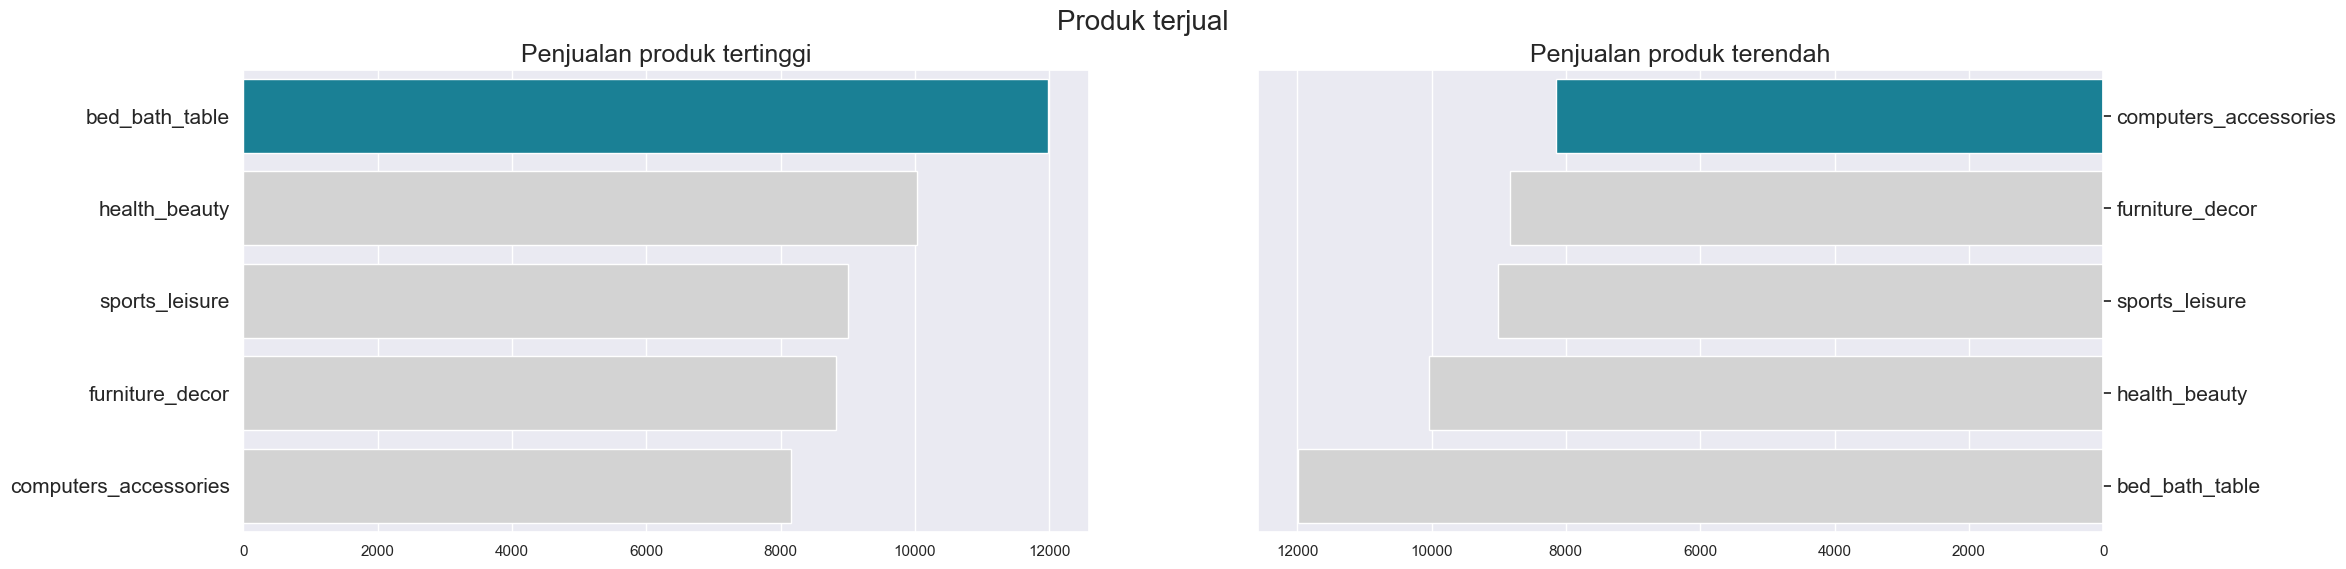

In [174]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#068DA9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="products", y="product_category_name_english", data=sumorderitems_dataframe.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Penjualan produk tertinggi", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="products", y="product_category_name_english", data=sumorderitems_dataframe.sort_values(by="products", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Penjualan produk terendah", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Produk terjual", fontsize=20)
plt.show()

### Pertanyaan 2: Bagaimana tingkat penjualan E-commerce seiring bejalannya waktu?

In [175]:
monthly_df = alldata_dataframe.resample(rule='M', on='order_approved_at').agg({
    "order_id": "nunique",
})
monthly_df.index = monthly_df.index.strftime('%B')
monthly_df = monthly_df.reset_index()
monthly_df.rename(columns={
    "order_id": "order_count",
}, inplace=True)
monthly_df.head()

,order_approved_at,order_count
0,September,1
1,October,320
2,November,0
3,December,1
4,January,760


In [176]:
monthly_df = monthly_df.sort_values('order_count').drop_duplicates('order_approved_at', keep='last')

In [177]:
monthly_df.head()

,order_approved_at,order_count
12,September,4301
13,October,4590
15,December,5832
21,June,6164
22,July,6176


In [178]:
monthly_df.sort_values(by='order_count')

,order_approved_at,order_count
12,September,4301
13,October,4590
15,December,5832
21,June,6164
22,July,6176
23,August,6620
17,February,6706
19,April,6778
20,May,7066
16,January,7187


In [179]:
month_mapping = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12
}

monthly_df["month_numeric"] = monthly_df["order_approved_at"].map(month_mapping)
monthly_df = monthly_df.sort_values("month_numeric")
monthly_df = monthly_df.drop("month_numeric", axis=1)

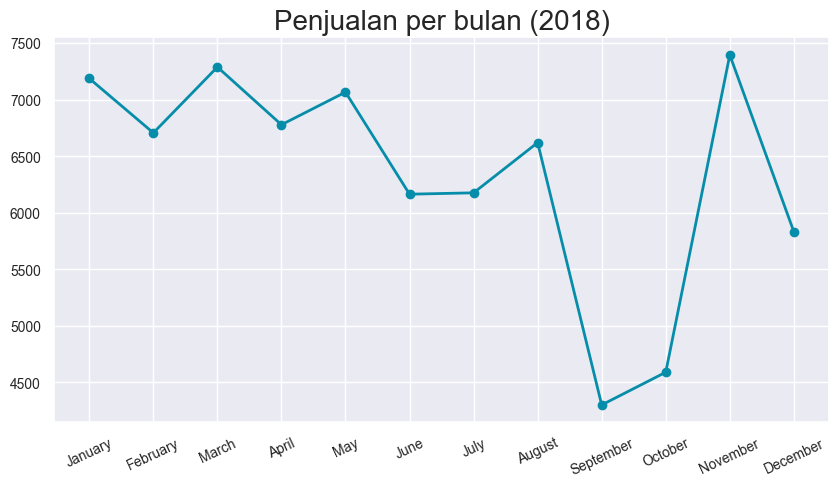

In [180]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_df["order_approved_at"],
    monthly_df["order_count"],
    marker='o',
    linewidth=2,
    color="#068DA9"
)
plt.title("Penjualan per bulan (2018)", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=25)
plt.yticks(fontsize=10)
plt.show()

Grafik di atas menunjukan bahwa terjadi penururnan yang cukup signifikan pada tingkat penjualan di bulan september dan mengalami kenaikan yang cukup signifikan pada bulan november. 

### Pertanyaan 3: Bagiaman karakteristik demografis pelanggan dan apakah terdapat preferensi pembelian di antara mereka?

#### Berdasarkan customer_state

In [181]:
bystate_dataframe = alldata_dataframe.groupby(by="customer_state").customer_id.nunique().reset_index()
bystate_dataframe.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
bystate_dataframe.head()

,customer_state,customer_count
0,AC,81
1,AL,413
2,AM,148
3,AP,68
4,BA,3380


C:\Users\Caturdianta\AppData\Local\Temp\ipykernel_13532\3629740811.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customer_state',


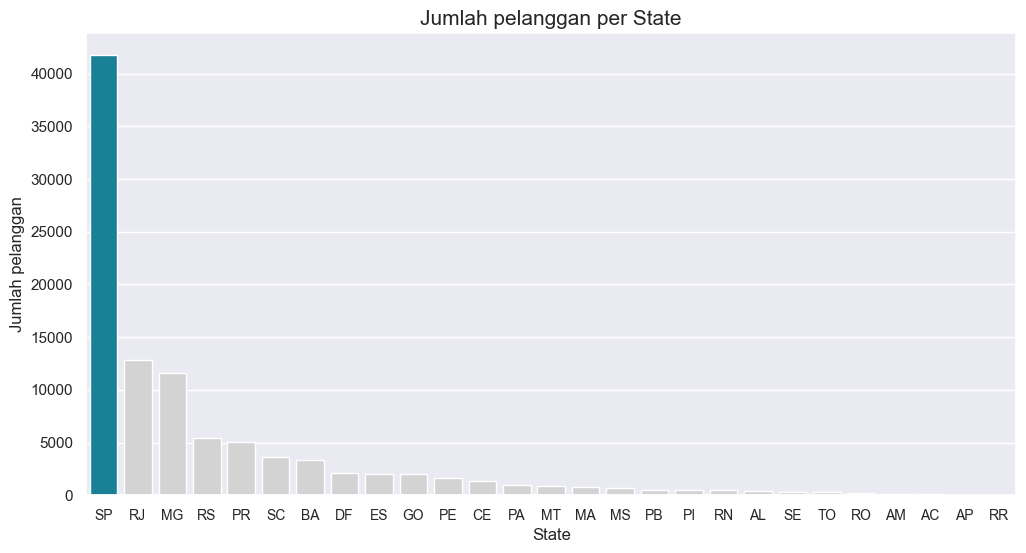

In [182]:
plt.figure(figsize=(12, 6))

most_common_state = bystate_dataframe.loc[bystate_dataframe['customer_count'].idxmax(), 'customer_state']

bystate_df = bystate_dataframe.sort_values(by='customer_count', ascending=False)

sns.barplot(x='customer_state', 
            y='customer_count', 
            data=bystate_df, 
            palette=["#068DA9" if state == most_common_state else "#D3D3D3" for state in bystate_df['customer_state']]
            )

plt.title("Jumlah pelanggan per State", fontsize=15)
plt.xlabel("State")
plt.ylabel("Jumlah pelanggan")
plt.xticks(fontsize=10)
plt.show()

Grafik diatas menunjukan bahwa SP memiliki pelanggan terbanyak berdasarkan state.

C:\Users\Caturdianta\AppData\Local\Temp\ipykernel_13532\2052365188.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bycity_df.index,


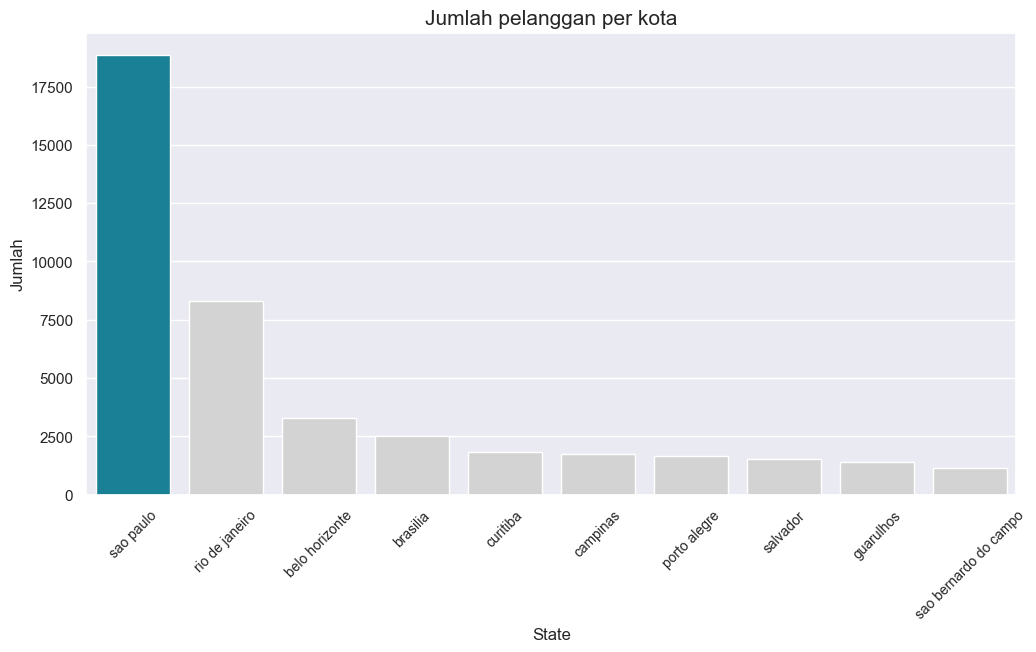

In [183]:
bycity_df = alldata_dataframe['customer_city'].value_counts().head(10)

plt.figure(figsize=(12, 6))

most_common_city = bycity_df.idxmax()

bycity_df = bycity_df.sort_values(ascending=False)

sns.barplot(x=bycity_df.index, 
            y=bycity_df.values, 
            palette=["#068DA9" if city == most_common_city else "#D3D3D3" for city in bycity_df.index]
            )

plt.title("Jumlah pelanggan per kota", fontsize=15)
plt.xlabel("State")
plt.ylabel("Jumlah")
plt.xticks(rotation=45, fontsize=10)
plt.show()

Grafik diatas menunjukan bahwa Sao Paulo memiliki pelanggan terbanyak berdasarkan kota.

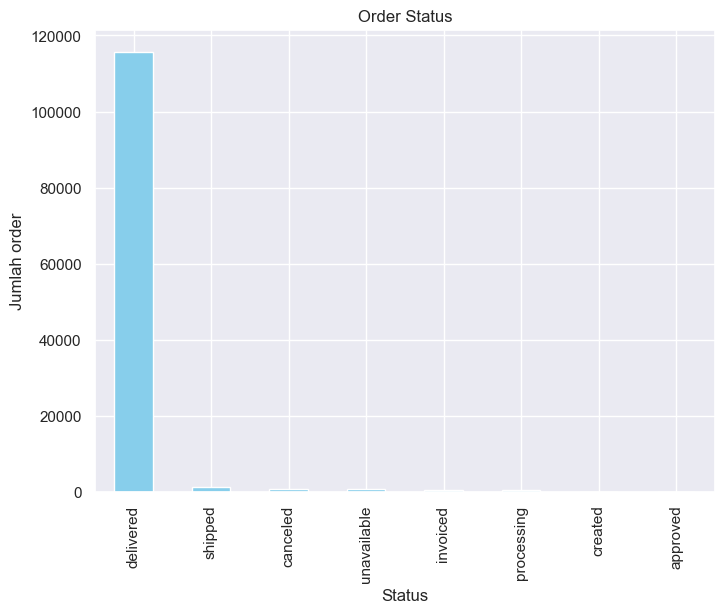

In [184]:
order_status_counts = alldata_dataframe['order_status'].value_counts()

plt.figure(figsize=(8, 6))
order_status_counts.plot(kind='bar', color='skyblue')
plt.title('Order Status')
plt.xlabel('Status')
plt.ylabel('Jumlah order')
plt.show()

Grafik diatas menunjukan bahwa delivered merupakan status order terbanyak.

### Pertanyaan 4: Jumlah pelanggan terbanyak berada di wilayah mana saja?

In [185]:
other_state_geolocation = geo_dataframe.groupby(['geolocation_zip_code_prefix'])['geolocation_state'].nunique().reset_index(name='count')
other_state_geolocation[other_state_geolocation['count']>= 2].shape
max_state = geo_dataframe.groupby(['geolocation_zip_code_prefix','geolocation_state']).size().reset_index(name='count').drop_duplicates(subset = 'geolocation_zip_code_prefix').drop('count',axis=1)

In [186]:
geolocation_silver = geo_dataframe.groupby(['geolocation_zip_code_prefix','geolocation_city','geolocation_state'])[['geolocation_lat','geolocation_lng']].median().reset_index()
geolocation_silver = geolocation_silver.merge(max_state,on=['geolocation_zip_code_prefix','geolocation_state'],how='inner')

In [187]:
customers_silver = customers_dataframe.merge(geolocation_silver,left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix',how='inner')

In [188]:
customers_silver.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,geolocation_zip_code_prefix,geolocation_city,geolocation_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,14409,franca,SP,-20.50207,-47.396822
1,5dca924cc99eea2dc5ba40d11ec5dd0f,2761fee7f378f0a8d7682d8a3fa07ab1,14409,franca,SP,Active,14409,franca,SP,-20.50207,-47.396822
2,661897d4968f1b59bfff74c7eb2eb4fc,d06a495406b79cb8203ea21cc0942f8c,14409,franca,SP,Active,14409,franca,SP,-20.50207,-47.396822
3,702b62324327ccba20f1be3465426437,8b3d988f330c1d1c3332ccd440c147b7,14409,franca,SP,Active,14409,franca,SP,-20.50207,-47.396822
4,bdf997bae7ca819b0415f5174d6b4302,866755e25db620f8d7e81b351a15bb2f,14409,franca,SP,Active,14409,franca,SP,-20.50207,-47.396822


In [189]:
customers_silver.to_csv("geolocation.csv", index=False)

In [190]:
def plot_brazil_map(data):
    brazil = mpimg.imread(urllib.request.urlopen('https://i.pinimg.com/originals/3a/0c/e1/3a0ce18b3c842748c255bc0aa445ad41.jpg'),'jpg')
    ax = data.plot(kind="scatter", x="geolocation_lng", y="geolocation_lat", figsize=(10,10), alpha=0.3,s=0.3,c='maroon')
    plt.axis('off')
    plt.imshow(brazil, extent=[-73.98283055, -33.8,-33.75116944,5.4])
    plt.show()

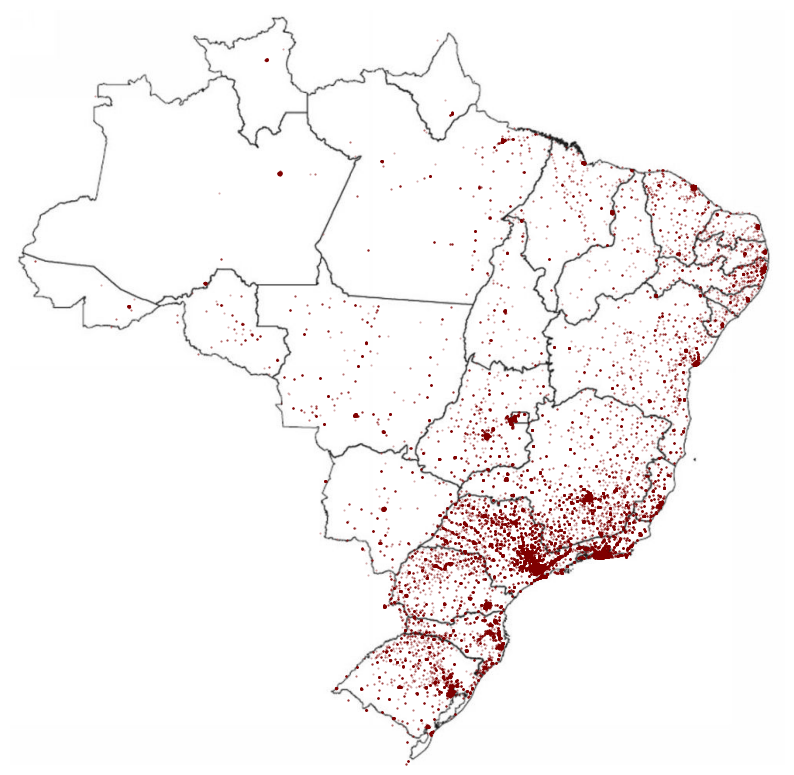

In [191]:
plot_brazil_map(customers_silver.drop_duplicates(subset='customer_unique_id'))

Pelanggan terbanyak berasal dari negara bagian selatan, tenggara dan barat.

### Pertanyaan 5: Menilai bagaimana tingkat kepuasan pelanggan terhdap pelayanan yang diberikan?

C:\Users\Caturdianta\AppData\Local\Temp\ipykernel_13532\2017441484.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=review_scores.index,


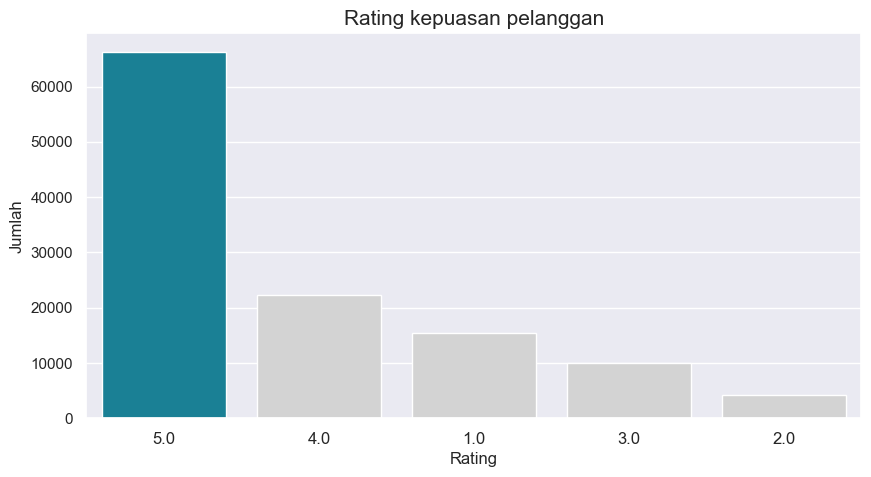

In [192]:
review_scores = alldata_dataframe['review_score'].value_counts().sort_values(ascending=False)

mostcommon_score = review_scores.idxmax()

sns.set(style="darkgrid")

plt.figure(figsize=(10, 5))
sns.barplot(x=review_scores.index, 
            y=review_scores.values, 
            order=review_scores.index,
            palette=["#068DA9" if score == mostcommon_score else "#D3D3D3" for score in review_scores.index]
            )

plt.title("Rating kepuasan pelanggan", fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Jumlah")
plt.xticks(fontsize=12)
plt.show()

Grafik diatas menenjukan bahwa pelanggan puas dengan pelayanan yang diberikan dengan jumlah rating 5.0 tertinggi.

## Conclusion

> Bagaimana cara mengetahui produk dengan total penjualan tertinggi dan terendah?
- pada grafik visualisasi data yang telah ditampilkan, produk "bed_bath_table" merupakan produk dengan total penjualan tertinggi dan "computers_accessories" merupakan produk dengan total penjualaan terendah.
> Bagaimana tingkat penjualan E-commerce seiring bejalannya waktu?
- Berdasarkan grafik visualisasi data yang terlah ditampilkan, terjadi penurunana tingkat penjualan di bulan september yang cukup signifikan dan terjadi kenaikan kembali yang cukup tinggi pada bulan November.
> Bagiaman karakteristik demografis pelanggan dan apakah terdapat preferensi pembelian di antara mereka?
- Berdasarkan grafik visualisasi data yang telah ditampilkan, wilayah yang memiliki jumlah pelanggan terbanyak adalah Sao Paulo, dengan Status pesanan yang paling umum adalah "delivered".
> Jumlah pelanggan terbanyak berada di wilayah mana saja?
- Berdasarkan grafik visualisasi data yang telah ditampilkan, wilayah selatan, tenggara dan barat menjadi wilayah dengan jumlah pelanggan yang tinggi dibandingkan wilayah lain. 
> Menilai bagaimana tingkat kepuasan pelanggan terhdap pelayanan yang diberikan?
- berdasarkan grafik visualisasi data yang telah ditampilkan, tingkat kepuasan pelanggan terhadap pelayanan yang diberikan sangat tinggi, dapat dilihat begitu banyak pelanggan yang memberikan rating 5 yang merupakan rating tertinggi.